# How can we choose the best model using Cross-Validation?

Based on Machine Learning Practices by Kevin Markham

- What is the __drawback of using the train/test split procedure__ for model evaluation?
- How does __K-fold cross-validation__ overcome this limitation?
- How can cross-validation be used for selecting __tuning parameters__, choosing between models, and selecting features?
- What are some possible __improvements__ to cross-validation?

_Let's see this using Iris Dataset_

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Using KNN Model

__This is the accuracy for this specific Train/Test Split Model random_state= 4...__

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 4) 

In [5]:
# KNN with K = 5
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
from sklearn import metrics 
metrics.accuracy_score(y_test, y_pred) 

0.9736842105263158

__This is the accuracy for this specific Train/Test Split Model random_state= 3...__

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 3) 
# KNN with K = 5
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
from sklearn import metrics 
metrics.accuracy_score(y_test, y_pred)

0.9473684210526315

___Testing Accuracy has changed!!!___

In [13]:
for num in range(20):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = num) 
    # KNN with K = 5
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    from sklearn import metrics 
    print('Random_State: %d Testing Accuracy: %s'% (num,metrics.accuracy_score(y_test, y_pred)))

Random_State: 0 Testing Accuracy: 0.9736842105263158
Random_State: 1 Testing Accuracy: 1.0
Random_State: 2 Testing Accuracy: 1.0
Random_State: 3 Testing Accuracy: 0.9473684210526315
Random_State: 4 Testing Accuracy: 0.9736842105263158
Random_State: 5 Testing Accuracy: 0.9473684210526315
Random_State: 6 Testing Accuracy: 0.9736842105263158
Random_State: 7 Testing Accuracy: 0.8947368421052632
Random_State: 8 Testing Accuracy: 0.9210526315789473
Random_State: 9 Testing Accuracy: 1.0
Random_State: 10 Testing Accuracy: 0.9736842105263158
Random_State: 11 Testing Accuracy: 0.9736842105263158
Random_State: 12 Testing Accuracy: 0.9736842105263158
Random_State: 13 Testing Accuracy: 0.8947368421052632
Random_State: 14 Testing Accuracy: 0.9736842105263158
Random_State: 15 Testing Accuracy: 0.9736842105263158
Random_State: 16 Testing Accuracy: 0.9210526315789473
Random_State: 17 Testing Accuracy: 0.9473684210526315
Random_State: 18 Testing Accuracy: 1.0
Random_State: 19 Testing Accuracy: 0.9473684

___Then we can create a bunch of Train/Test Split Models, calculating the testing accuracy for each and averaging the results___

### Cross-Validation

![title](Img/cross.png)

#### Understanding Cross-Validation

In [14]:
# simulate splitting a dataset of 25 observations into 5 folds
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=False).split(range(25))

# print the contents of each training and testing set
print('{} {:^61} {}'.format('Iteration', 'Training set observations', 'Testing set observations'))
for iteration, data in enumerate(kf, start=1):
    print('{:^9} {} {:^25}'.format(iteration, data[0], str(data[1])))

Iteration                   Training set observations                   Testing set observations
    1     [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [0 1 2 3 4]       
    2     [ 0  1  2  3  4 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [5 6 7 8 9]       
    3     [ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19 20 21 22 23 24]     [10 11 12 13 14]     
    4     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 20 21 22 23 24]     [15 16 17 18 19]     
    5     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]     [20 21 22 23 24]     


### Comparing cross-validation to train/test split

##### Advantages of cross-validation:

- More accurate estimate of out-of-sample accuracy
- More "efficient" use of data (every observation is used for both training and testing)

##### Advantages of train/test split:

- Runs K times faster than K-fold cross-validation
- Simpler to examine the detailed results of the testing process

##### Cross-validation recommendations

- K can be any number, but K=10 is generally recommended
- For classification problems, stratified sampling is recommended for creating the folds
    - Each response class should be represented with equal proportions in each of the K folds
    - scikit-learn's cross_val_score function does this by default

In [24]:
# 10 Fold cross-validation with K=5 KNN

from sklearn.model_selection import cross_val_score
knn=KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')

In [25]:
scores

array([1.        , 0.93333333, 1.        , 1.        , 0.86666667,
       0.93333333, 0.93333333, 1.        , 1.        , 1.        ])

In [26]:
scores.mean()

0.9666666666666668

In [28]:
# Now we want to find the optimal value of K for KNN

k_range = range(1,31)
k_scores = []

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
    print('K = %s, Score_mean = %s'%(k,scores.mean()))

K = 1, Score_mean = 0.96
K = 2, Score_mean = 0.9533333333333334
K = 3, Score_mean = 0.9666666666666666
K = 4, Score_mean = 0.9666666666666666
K = 5, Score_mean = 0.9666666666666668
K = 6, Score_mean = 0.9666666666666668
K = 7, Score_mean = 0.9666666666666668
K = 8, Score_mean = 0.9666666666666668
K = 9, Score_mean = 0.9733333333333334
K = 10, Score_mean = 0.9666666666666668
K = 11, Score_mean = 0.9666666666666668
K = 12, Score_mean = 0.9733333333333334
K = 13, Score_mean = 0.9800000000000001
K = 14, Score_mean = 0.9733333333333334
K = 15, Score_mean = 0.9733333333333334
K = 16, Score_mean = 0.9733333333333334
K = 17, Score_mean = 0.9733333333333334
K = 18, Score_mean = 0.9800000000000001
K = 19, Score_mean = 0.9733333333333334
K = 20, Score_mean = 0.9800000000000001
K = 21, Score_mean = 0.9666666666666666
K = 22, Score_mean = 0.9666666666666666
K = 23, Score_mean = 0.9733333333333334
K = 24, Score_mean = 0.96
K = 25, Score_mean = 0.9666666666666666
K = 26, Score_mean = 0.96
K = 27, Sco

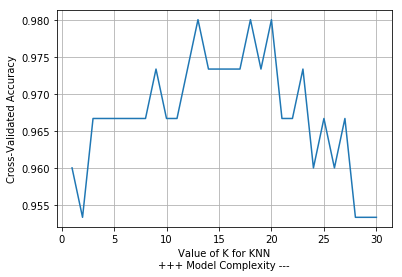

In [33]:
plt.plot(k_range,k_scores)
plt.xlabel('Value of K for KNN\n+++ Model Complexity ---')
plt.ylabel('Cross-Validated Accuracy')
plt.grid(True);

___Low values of K = Low Bias Model and High Variance___

___High values of K = High Bias and Low Variance___

___K = 1 Model with High Complexity, High Variance and Low Bias___

___K >>> Model with Low Complexity, High Bias and Low Variance___

### Cross-Validation: Model Selection (KNN or Logistic Regression)

In [35]:
# 10 Fold cross-validation with K=20 KNN

from sklearn.model_selection import cross_val_score
knn=KNeighborsClassifier(n_neighbors=20)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
scores.mean()

0.9800000000000001

In [36]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
scores = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
scores.mean()

0.9533333333333334

___KNN K=20 is better than Log Regression in this case___

### Cross-Validation: Feature Selection

In [38]:
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv',index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [39]:
feature_cols= ['TV','radio','newspaper']

X = data[feature_cols]

y = data['sales']

In [46]:
# Let's go to choose Linear Regression and Cross-Validated Model to do this

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
from sklearn.model_selection import cross_val_score
scores = cross_val_score(linreg, X, y, cv=10, scoring='neg_mean_squared_error')
scores

array([-3.56038438, -3.29767522, -2.08943356, -2.82474283, -1.3027754 ,
       -1.74163618, -8.17338214, -2.11409746, -3.04273109, -2.45281793])

In [47]:
# fixing the sign of MSE scores

mse_scores = -scores
mse_scores

array([3.56038438, 3.29767522, 2.08943356, 2.82474283, 1.3027754 ,
       1.74163618, 8.17338214, 2.11409746, 3.04273109, 2.45281793])

In [51]:
# Calculating RMSE Error

rmse_scores= np.sqrt(mse_scores)
rmse_scores

array([1.88689808, 1.81595022, 1.44548731, 1.68069713, 1.14139187,
       1.31971064, 2.85891276, 1.45399362, 1.7443426 , 1.56614748])

In [52]:
# RMSE Error Average

rmse_scores.mean()

1.6913531708051797

___Selecting the best features: Removing newspaper___

In [53]:
feature_cols = ['TV','radio']
X = data[feature_cols]
y = data['sales']
linreg = LinearRegression()
np.sqrt(-cross_val_score(linreg, X, y, cv=10, scoring='neg_mean_squared_error')).mean()

1.6796748419090766

### Improvements to cross-validation

#### Repeated cross-validation

- Repeat cross-validation multiple times (with different random splits of the data) and average the results
- More reliable estimate of out-of-sample performance by reducing the variance associated with a single trial of cross-validation

#### Creating a hold-out set

- "Hold out" a portion of the data before beginning the model building process
- Locate the best model using cross-validation on the remaining data, and test it using the hold-out set
- More reliable estimate of out-of-sample performance since hold-out set is truly out-of-sample

#### Feature engineering and selection within cross-validation iterations

- Normally, feature engineering and selection occurs before cross-validation
- Instead, perform all feature engineering and selection within each cross-validation iteration
- More reliable estimate of out-of-sample performance since it better mimics the application of the model to out-of-sample data